# **Initial Library Loading**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# **1. EXPLORATORY DATA ANAYLSIS**

In [2]:
df=pd.read_csv("extended_salary_data.csv")
print(df)
X=np.array(df.iloc[:,0])
y=train=np.array(df.iloc[:,1])
X=np.expand_dims(X,-1)
print(X)
print(y)

    YearsExperience     Salary
0               8.1   77884.67
1              19.1  127213.68
2              14.9  103343.52
3              12.4   88988.96
4               4.0   35214.78
5               4.0   42801.56
6               2.1   35893.61
7              17.5  128071.22
8              12.4   95436.18
9              14.5   84869.60
10              1.4   40240.84
11             19.4  123149.18
12             16.8  107230.78
13              5.0   61116.76
14              4.5   62810.00
15              4.5   61812.80
16              6.8   55607.82
17             11.0   81907.88
18              9.2   79312.63
19              6.5   72255.45
20             12.6   88208.26
21              3.7   46643.41
22              6.6   51936.65
23              8.0   58037.93
24              9.7   86625.26
25             15.9  123062.40
26              4.8   53279.90
27             10.8   94035.33
28             12.3   95116.36
29              1.9   33048.80
30             12.5   96113.96
31      

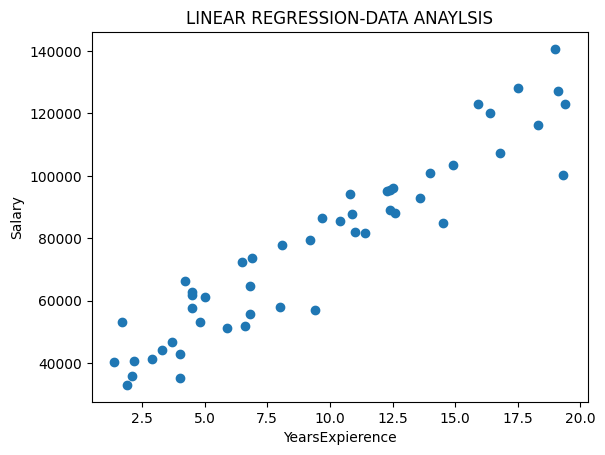

In [3]:
plt.scatter(X,y)
plt.xlabel("YearsExpierence")
plt.ylabel("Salary")
plt.title("LINEAR REGRESSION-DATA ANAYLSIS")
plt.show()

In [4]:
print(df.describe())

       YearsExperience        Salary
count        50.000000      50.00000
mean          9.480000   77370.54740
std           5.485491   28298.92442
min           1.400000   33048.80000
25%           4.500000   53861.88000
50%           9.300000   78598.65000
75%          13.350000   95356.22500
max          19.400000  140646.44000


# **2. BUILDING A LINEAR REGRESSION MODEL**

In [5]:
def split_indices(n,test_frac,seed):
    n_test=int(test_frac*n)
    np.random.seed(seed)
    idx=np.random.permutation(n)
    return idx[n_test:],idx[:n_test]

In [6]:
test_frac=0.2
seed=42

train_idx,test_idx=split_indices(df.shape[0],test_frac,seed)
print("Number of elements in training set: {}".format(len(train_idx)))
print("Number of elements in testing set:{}".format(len(test_idx)))

Number of elements in training set: 40
Number of elements in testing set:10


In [7]:
X_train=X[train_idx]
y_train=y[train_idx]
X_test=X[test_idx]
y_test=y[test_idx]
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
print(X_train)

(40, 1) (10, 1) (40,) (10,)
[[16.8]
 [ 4. ]
 [ 2.9]
 [12.4]
 [12.4]
 [ 2.1]
 [10.4]
 [ 6.9]
 [10.9]
 [ 4.5]
 [14.5]
 [ 6.8]
 [ 9.7]
 [19.3]
 [ 4.2]
 [ 8.1]
 [ 5.9]
 [10.8]
 [19. ]
 [ 4. ]
 [ 1.9]
 [19.4]
 [ 6.8]
 [19.1]
 [ 3.7]
 [14.9]
 [18.3]
 [16.4]
 [ 8. ]
 [ 3.3]
 [ 1.4]
 [ 6.6]
 [ 9.2]
 [ 4.5]
 [12.6]
 [17.5]
 [ 1.7]
 [ 4.5]
 [12.3]
 [14. ]]


In [8]:
class LinearRegression:
    def __init__(self,lr=0.01,epochs=30):
        self.lr=lr
        self.epochs=epochs
        self.weights=None
        self.bias=None

    def train(self,X,y):
        self.weights=np.zeros(X.shape[1])
        self.bias=0
        for i in range(self.epochs):
            self.update_weights(X,y)
    def update_weights(self,X,y):
        y_pred=self.bias+np.dot(X,self.weights)
        self.weights-=(self.lr)*(1/len(y_pred))*(np.dot(X.T,y_pred-y))
        self.bias-=(self.lr)*(np.mean(y_pred-y))
    def predict(self,X):
        return self.bias+np.dot(X,self.weights)
                              
                            
        
    

In [9]:
model=LinearRegression(0.0001,200000)
model.train(X_train,y_train)

In [10]:
def mean_squared_error(y_pred,y):
    return np.mean((y_pred-y)**2)
    

In [11]:
def mean_absolute_error(y_pred,y):
    return np.mean(abs(y_pred-y))

In [12]:
y_pred=model.predict(X_train)
print("MSE value:{}".format(mean_squared_error(y_pred,y_train)))
print("MAE value:{}".format(mean_absolute_error(y_pred,y_train)))

MSE value:83011267.14080681
MAE value:7433.196909720498


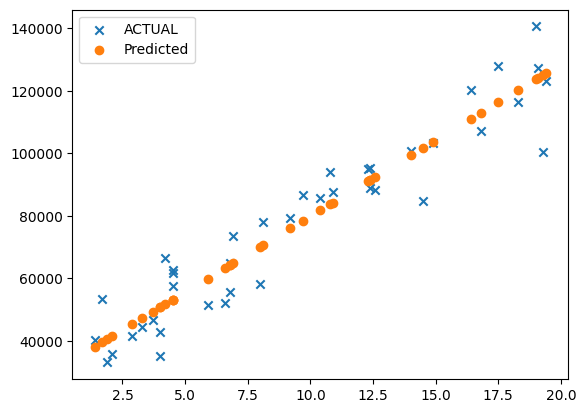

In [13]:
plt.scatter(X_train,y_train,marker='x',label="ACTUAL")
plt.scatter(X_train,y_pred,marker='o',label="Predicted")
plt.legend()
plt.show()

# **EVALUATE--TESTING TIME!**

In [14]:
y_test_pred=model.predict(X_test)
print("MSE value:{}".format(mean_squared_error(y_test_pred,y_test)))
print("MAE value:{}".format(mean_absolute_error(y_test_pred,y_test)))

MSE value:79468924.22436948
MAE value:6819.022999103681


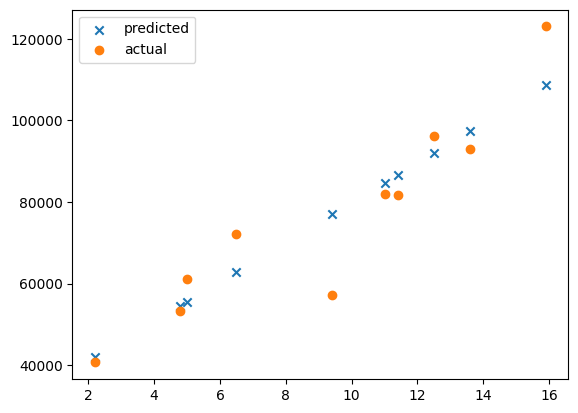

In [15]:
plt.scatter(X_test,y_test_pred,marker='x',label="predicted")
plt.scatter(X_test,y_test,marker='o',label="actual")
plt.legend()
plt.show()

# **BONUS**

In [16]:
new_df=pd.read_csv("final_new_salary_data.csv")
print(new_df)

    Unnamed: 0  YearsExperience     Salary  NumProjectCompleted
0            0              8.1   77884.67                    5
1            1             19.1  127213.68                   14
2            2             14.9  103343.52                   10
3            3             12.4   88988.96                    8
4            4              4.0   35214.78                    2
5            5              4.0   42801.56                    2
6            6              2.1   35893.61                    0
7            7             17.5  128071.22                   13
8            8             12.4   95436.18                    8
9            9             14.5   84869.60                   10
10          10              1.4   40240.84                    0
11          11             19.4  123149.18                   14
12          12             16.8  107230.78                   12
13          13              5.0   61116.76                    3
14          14              4.5   62810.

In [17]:
P=np.array(new_df[["YearsExperience","NumProjectCompleted"]])
q=train=np.array(df.iloc[:,1])

print(P)
print(q)

[[ 8.1  5. ]
 [19.1 14. ]
 [14.9 10. ]
 [12.4  8. ]
 [ 4.   2. ]
 [ 4.   2. ]
 [ 2.1  0. ]
 [17.5 13. ]
 [12.4  8. ]
 [14.5 10. ]
 [ 1.4  0. ]
 [19.4 14. ]
 [16.8 12. ]
 [ 5.   3. ]
 [ 4.5  2. ]
 [ 4.5  2. ]
 [ 6.8  4. ]
 [11.   7. ]
 [ 9.2  6. ]
 [ 6.5  4. ]
 [12.6  9. ]
 [ 3.7  1. ]
 [ 6.6  4. ]
 [ 8.   5. ]
 [ 9.7  6. ]
 [15.9 11. ]
 [ 4.8  2. ]
 [10.8  7. ]
 [12.3  8. ]
 [ 1.9  0. ]
 [12.5  9. ]
 [ 4.2  2. ]
 [ 2.2  0. ]
 [19.  14. ]
 [19.3 14. ]
 [16.4 12. ]
 [ 6.8  4. ]
 [ 2.9  1. ]
 [14.  10. ]
 [ 9.4  6. ]
 [ 3.3  1. ]
 [10.4  7. ]
 [ 1.7  0. ]
 [18.3 13. ]
 [ 5.9  3. ]
 [13.6  9. ]
 [ 6.9  4. ]
 [10.9  7. ]
 [11.4  8. ]
 [ 4.5  2. ]]
[ 77884.67 127213.68 103343.52  88988.96  35214.78  42801.56  35893.61
 128071.22  95436.18  84869.6   40240.84 123149.18 107230.78  61116.76
  62810.    61812.8   55607.82  81907.88  79312.63  72255.45  88208.26
  46643.41  51936.65  58037.93  86625.26 123062.4   53279.9   94035.33
  95116.36  33048.8   96113.96  66380.37  40641.74 140646.44 1003

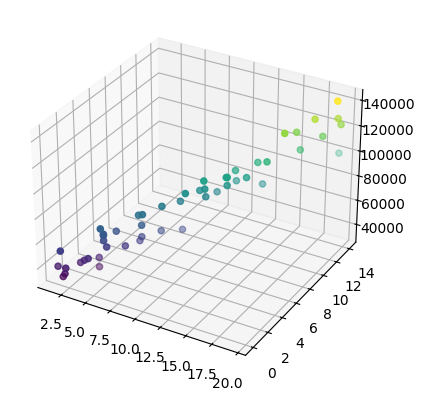

In [19]:
x1=new_df["YearsExperience"]
x2=new_df["NumProjectCompleted"]
fig=plt.figure()
ax=fig.add_subplot(111,projection="3d")

ax.scatter(x1,x2,q,c=q,marker='o')
plt.show()

In [20]:
test_frac=0.2
seed=42

train_idx_n,test_idx_n=split_indices(new_df.shape[0],test_frac,seed)
print("Number of elements in training set: {}".format(len(train_idx_n)))
print("Number of elements in testing set:{}".format(len(test_idx_n)))

Number of elements in training set: 40
Number of elements in testing set:10


In [21]:
P_train=P[train_idx]
q_train=q[train_idx]
P_test=P[test_idx]
q_test=q[test_idx]
print(P_train.shape,P_test.shape,q_train.shape,q_test.shape)
print(P_train)

(40, 2) (10, 2) (40,) (10,)
[[16.8 12. ]
 [ 4.   2. ]
 [ 2.9  1. ]
 [12.4  8. ]
 [12.4  8. ]
 [ 2.1  0. ]
 [10.4  7. ]
 [ 6.9  4. ]
 [10.9  7. ]
 [ 4.5  2. ]
 [14.5 10. ]
 [ 6.8  4. ]
 [ 9.7  6. ]
 [19.3 14. ]
 [ 4.2  2. ]
 [ 8.1  5. ]
 [ 5.9  3. ]
 [10.8  7. ]
 [19.  14. ]
 [ 4.   2. ]
 [ 1.9  0. ]
 [19.4 14. ]
 [ 6.8  4. ]
 [19.1 14. ]
 [ 3.7  1. ]
 [14.9 10. ]
 [18.3 13. ]
 [16.4 12. ]
 [ 8.   5. ]
 [ 3.3  1. ]
 [ 1.4  0. ]
 [ 6.6  4. ]
 [ 9.2  6. ]
 [ 4.5  2. ]
 [12.6  9. ]
 [17.5 13. ]
 [ 1.7  0. ]
 [ 4.5  2. ]
 [12.3  8. ]
 [14.  10. ]]


In [22]:
model=LinearRegression(0.01,100000)
model.train(P_train,q_train)

In [23]:
q_pred=model.predict(P_train)
print("MSE value:{}".format(mean_squared_error(q_pred,q_train)))
print("MAE value:{}".format(mean_absolute_error(q_pred,q_train)))

MSE value:82798018.88913886
MAE value:7391.229180321518


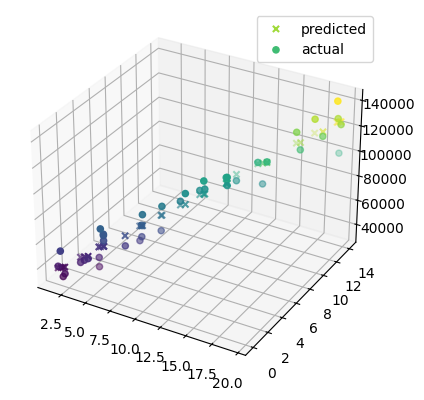

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(P_train[:,0],P_train[:,1],q_pred,c=q_pred,marker='x',label="predicted")
ax.scatter(P_train[:,0],P_train[:,1],q_train,c=q_train,marker='o',label="actual")
ax.legend()
plt.show()


In [26]:
q_test_pred=model.predict(P_test)
print("MSE value:{}".format(mean_squared_error(q_test_pred,q_test)))
print("MAE value:{}".format(mean_absolute_error(q_test_pred,q_test)))

MSE value:77732114.28418373
MAE value:6467.415833627334


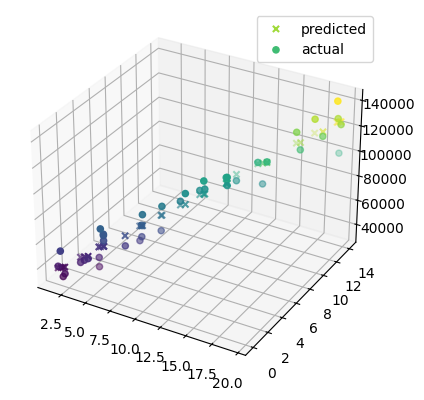

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(P_train[:,0],P_train[:,1],q_pred,c=q_pred,marker='x',label="predicted")
ax.scatter(P_train[:,0],P_train[:,1],q_train,c=q_train,marker='o',label="actual")
ax.legend()
plt.show()
